In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline
from math import sqrt 
import warnings
from collections import Counter 

In [ ]:
# Load iris data and store in dataframe

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
inputs = df.drop(['target'],axis='columns')
target = df['target']

In [ ]:
inputs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

**Feature Selection Techniques:**

1.   Univariate Selection
2.   Feature Importance 
3.   Correlation Matrix with Heatmap



In [ ]:
# 1) Univariate Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#apply SelectKBest class to extract top 4 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(inputs,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score')) 

            Features       Score
2  petal length (cm)  116.312613
3   petal width (cm)   67.048360
0  sepal length (cm)   10.817821
1   sepal width (cm)    3.710728


In [ ]:
#2) Feature Imporatnce
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

sepal length (cm) -- 0.1215074337212456
sepal width (cm) -- 0.06203582759062518
petal length (cm) -- 0.3793484065267275
petal width (cm) -- 0.4371083321614016


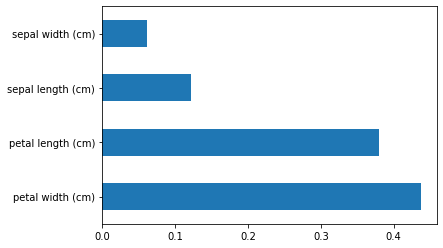

In [ ]:
model = ExtraTreesClassifier()
model.fit(inputs,target)

#use inbuilt class feature_importances of tree based classifiers

feature_imporatnce_columns=list(zip(inputs.columns, model.feature_importances_))
for col,score in feature_imporatnce_columns:
    print(col,'--',score)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=inputs.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# 3.Correlation Matrix with Heatmap
import seaborn as sns

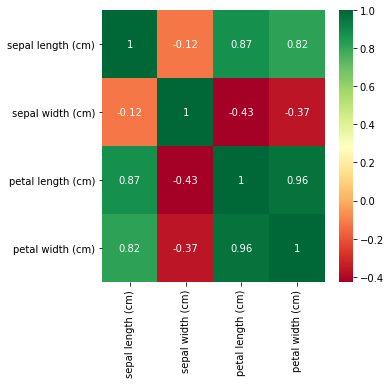

In [ ]:
#get correlations of each features in dataset
corrmat = inputs.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(inputs[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Pair Plot:**


KeyError: ignored

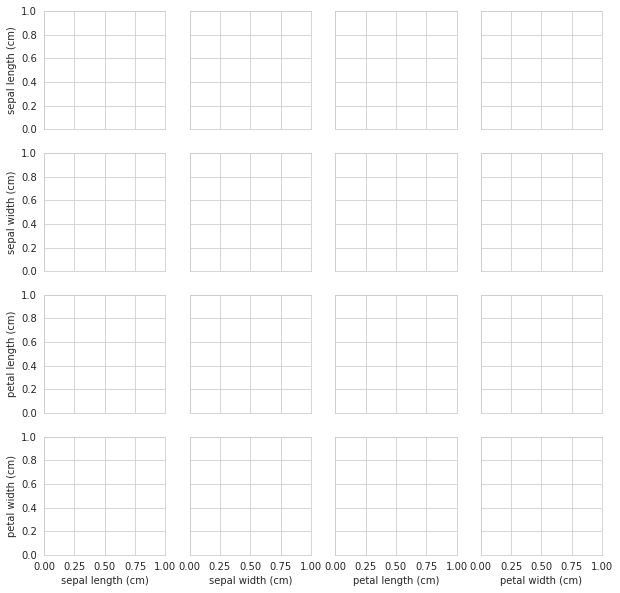

In [37]:
sns.set_style("whitegrid");
sns.pairplot(inputs, hue="species",);
plt.show()